In [316]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/daily_data.csv
/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/submission.csv


In [317]:
daily_data=pd.read_csv("/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/daily_data.csv")
submission=pd.read_csv("/kaggle/input/predicta-1-0-predict-the-unpredictable-part-2/submission.csv")


# Data description And cleaning

In [318]:
daily_data.isnull().sum()

day_id                         0
city_id                        0
temperature_celsius            0
condition_text              2414
wind_kph                       0
wind_degree                    0
pressure_mb                    0
precip_mm                      0
humidity                       0
cloud                          0
feels_like_celsius             0
visibility_km                  0
uv_index                       0
gust_kph                       0
air_quality_us-epa-index       0
sunrise                        0
sunset                         0
dtype: int64

In [319]:
daily_data.shape

(2893, 17)

In [320]:
daily_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2888    False
2889    False
2890    False
2891    False
2892    False
Length: 2893, dtype: bool

In [321]:
#there are no missing values and duplicate values except "condition_text"

In [322]:
daily_data.describe()

,temperature_celsius,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index
count,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000,2893.000000
mean,22.024577,10.304805,158.994469,1013.745938,0.165299,74.773591,32.073280,23.725752,9.745524,2.216730,16.930522,1.599032
std,6.615540,7.264472,103.021634,6.172045,0.937061,19.335724,32.584184,8.877424,2.489918,2.238163,10.541449,1.062513
min,-2.000000,3.600000,1.000000,982.000000,0.000000,4.000000,0.000000,-4.300000,0.000000,1.000000,0.700000,1.000000
25%,17.000000,5.000000,70.000000,1010.000000,0.000000,66.000000,0.000000,17.000000,10.000000,1.000000,9.000000,1.000000
50%,22.000000,8.300000,150.000000,1014.000000,0.000000,78.000000,25.000000,24.500000,10.000000,1.000000,15.100000,1.000000
75%,27.000000,13.000000,236.000000,1018.000000,0.000000,89.000000,68.000000,30.000000,10.000000,1.000000,22.300000,2.000000
max,45.000000,74.200000,360.000000,1036.000000,28.700000,100.000000,100.000000,73.600000,32.000000,10.000000,75.600000,6.000000


## Visualization of variables 

/tmp/ipykernel_33/36619342.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  daily_data.plot(ax=ax, kind="box", subplots=True, layout=(6,4), sharex=False)


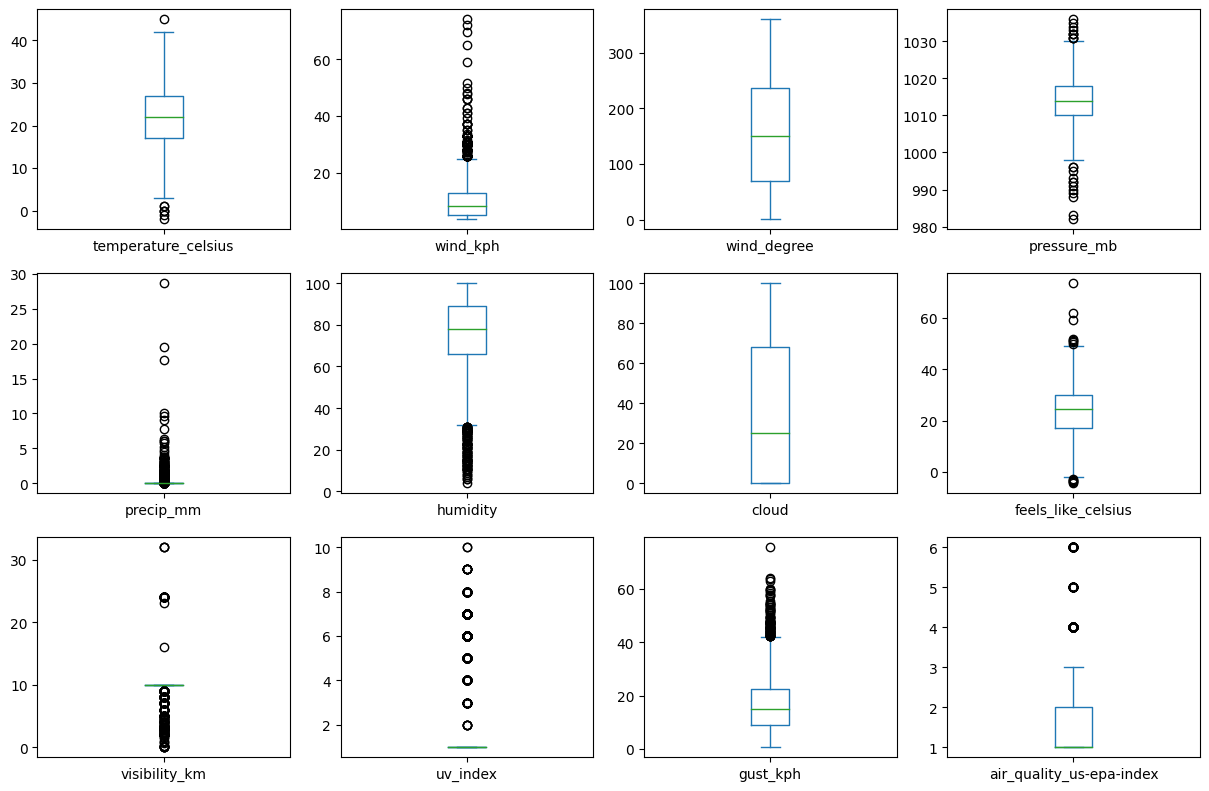

In [323]:
#box plot for numerical varibales
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,20))
ax=fig.gca()
daily_data.plot(ax=ax, kind="box", subplots=True, layout=(6,4), sharex=False)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


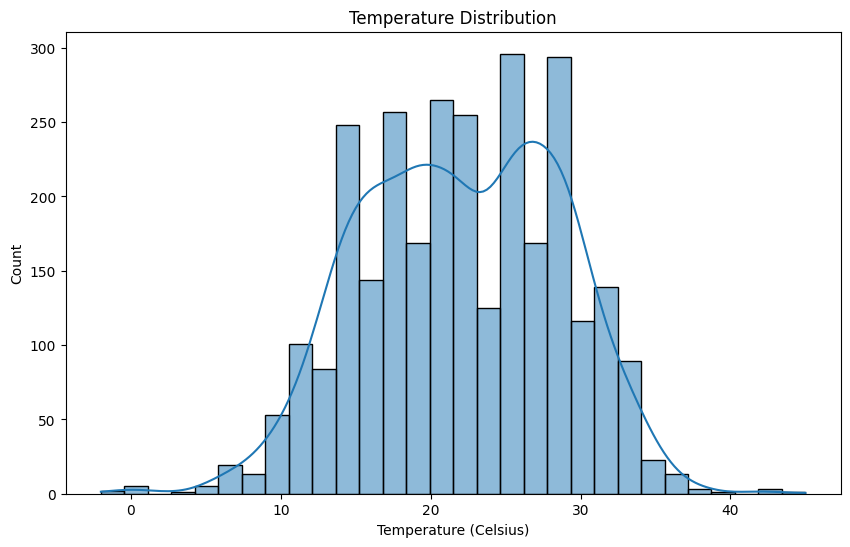

In [324]:
#Distribution for numerical variables
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(daily_data['temperature_celsius'], kde=True,bins=30)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (Celsius)')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


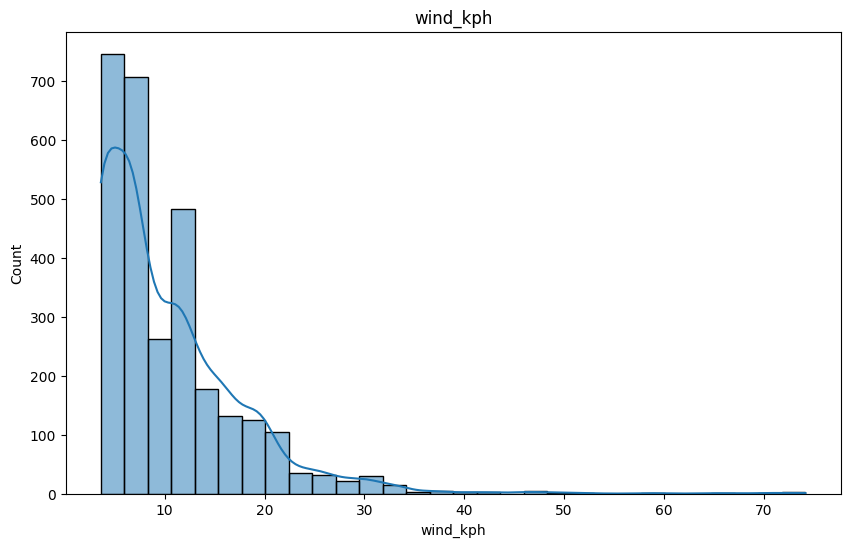

In [325]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(daily_data['wind_kph'], kde=True,bins=30)
plt.title('wind_kph')
plt.xlabel('wind_kph')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


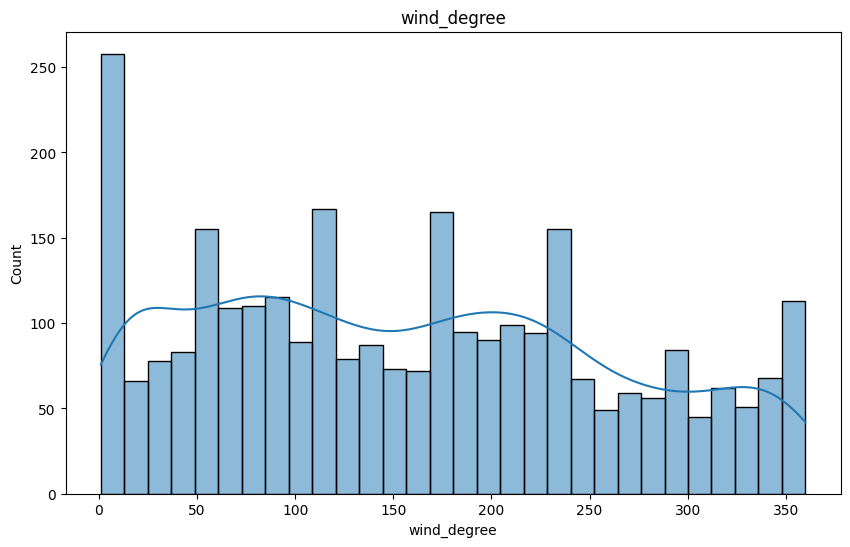

In [326]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(daily_data['wind_degree'], kde=True,bins=30)
plt.title('wind_degree')
plt.xlabel('wind_degree')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


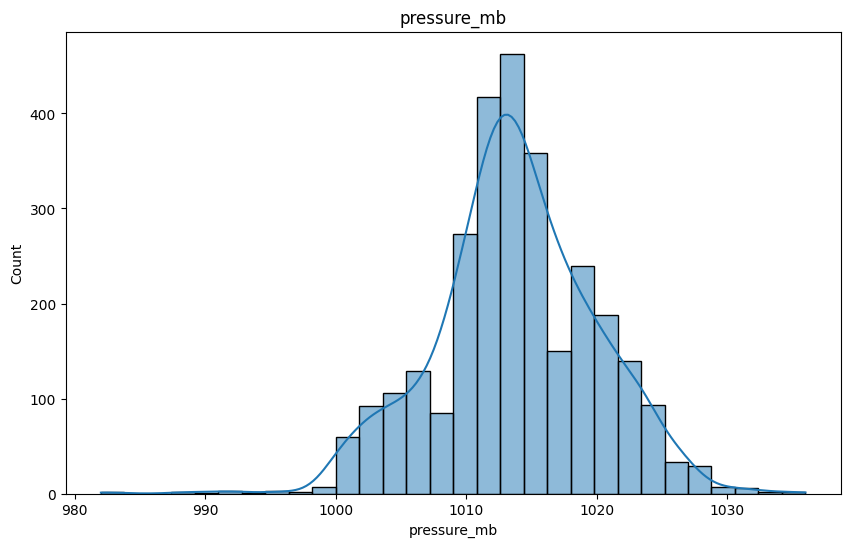

In [327]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(daily_data['pressure_mb'], kde=True,bins=30)
plt.title('pressure_mb')
plt.xlabel('pressure_mb')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


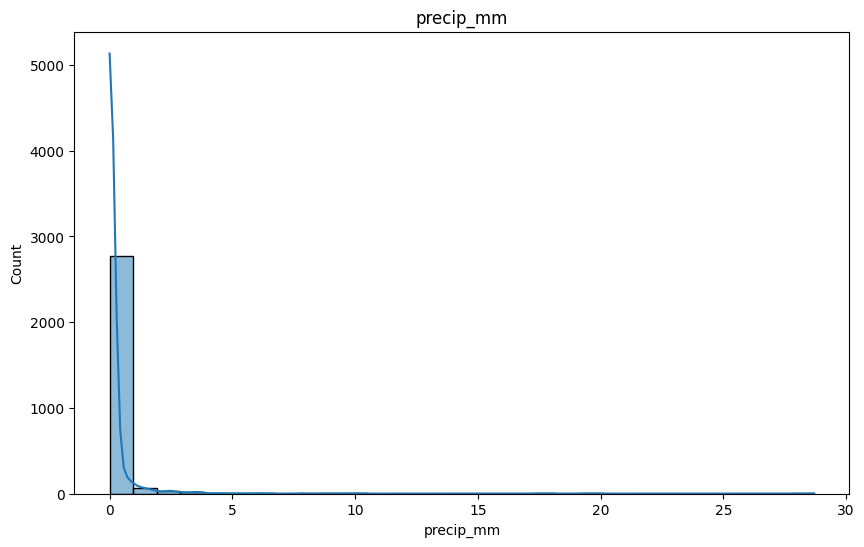

In [328]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(daily_data['precip_mm'], kde=True,bins=30)
plt.title('precip_mm')
plt.xlabel('precip_mm')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


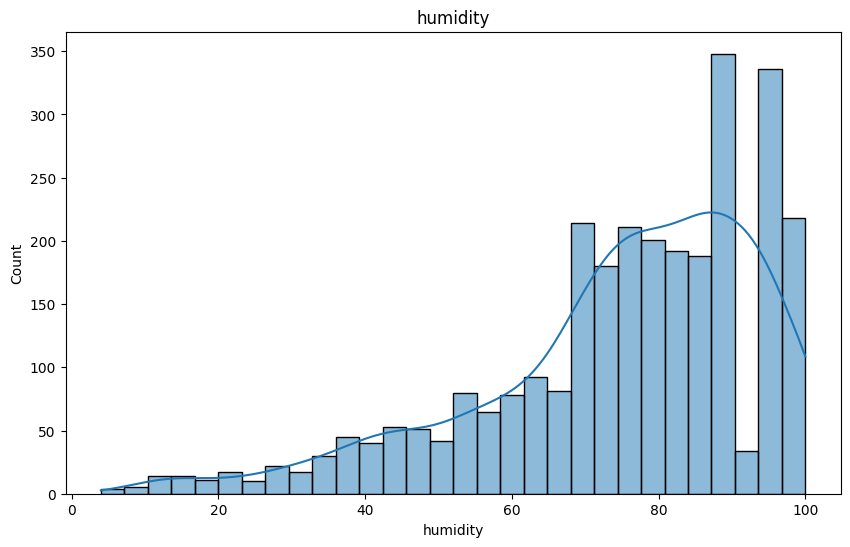

In [329]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(daily_data['humidity'], kde=True,bins=30)
plt.title('humidity')
plt.xlabel('humidity')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


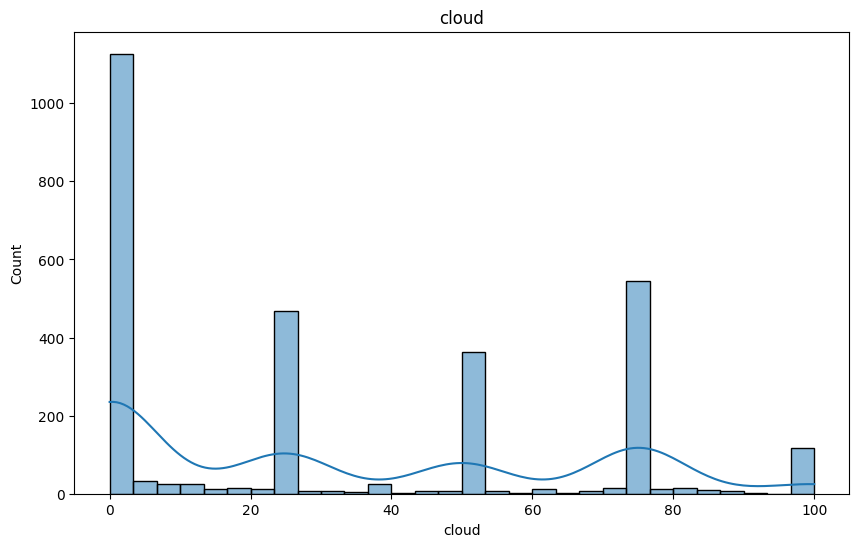

In [330]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(daily_data['cloud'], kde=True,bins=30)
plt.title('cloud')
plt.xlabel('cloud')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


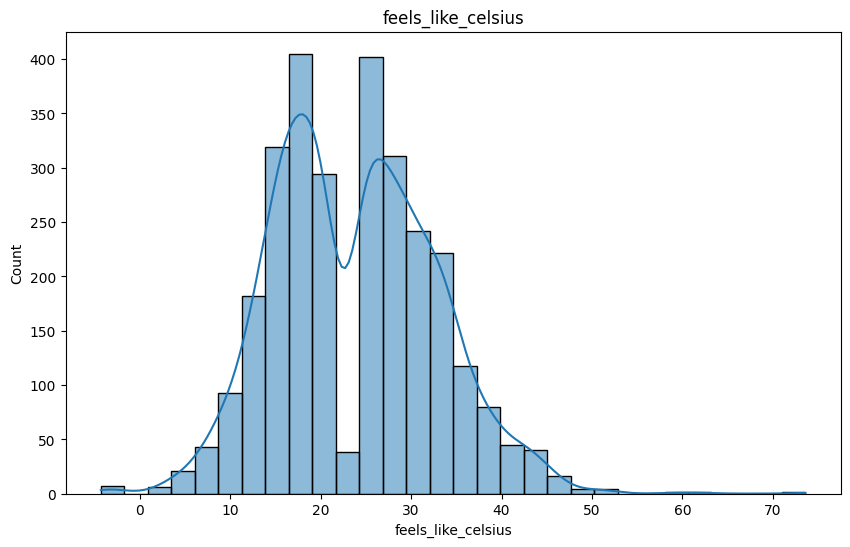

In [331]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(daily_data['feels_like_celsius'], kde=True,bins=30)
plt.title('feels_like_celsius')
plt.xlabel('feels_like_celsius')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


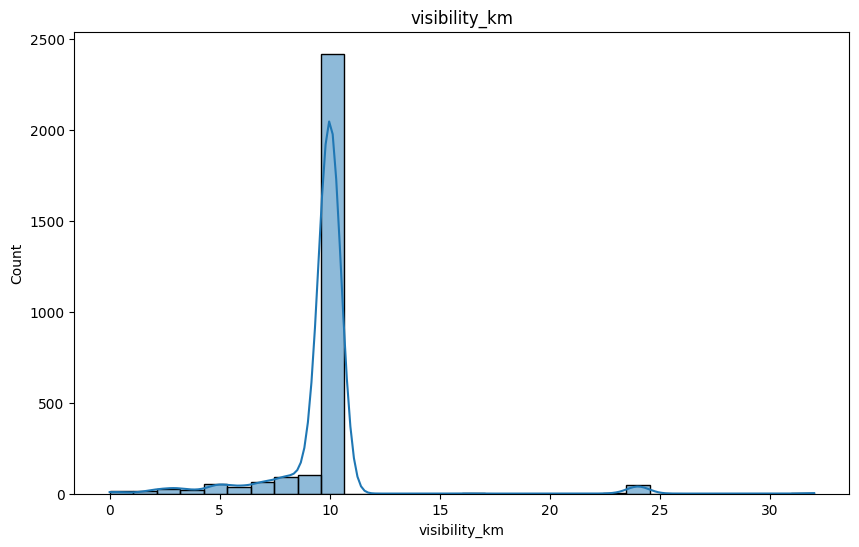

In [332]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(daily_data['visibility_km'], kde=True,bins=30)
plt.title('visibility_km')
plt.xlabel('visibility_km')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


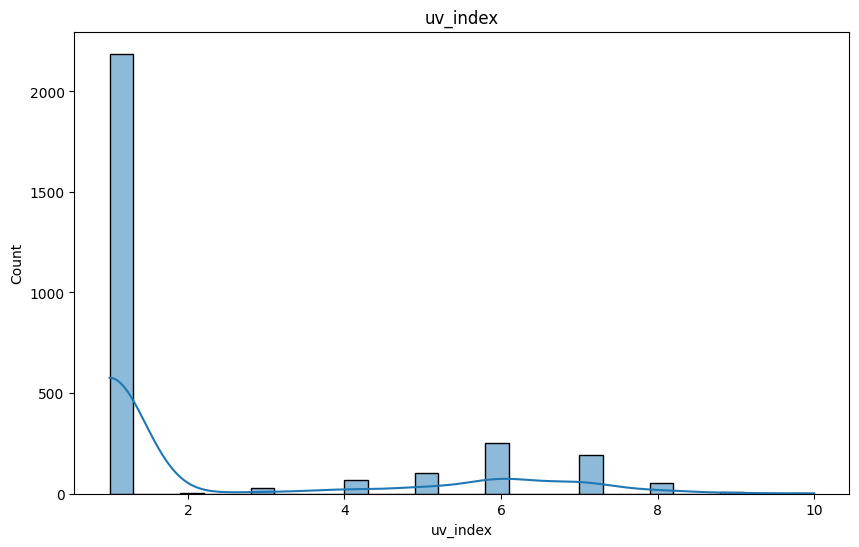

In [333]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(daily_data['uv_index'], kde=True,bins=30)
plt.title('uv_index')
plt.xlabel('uv_index')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


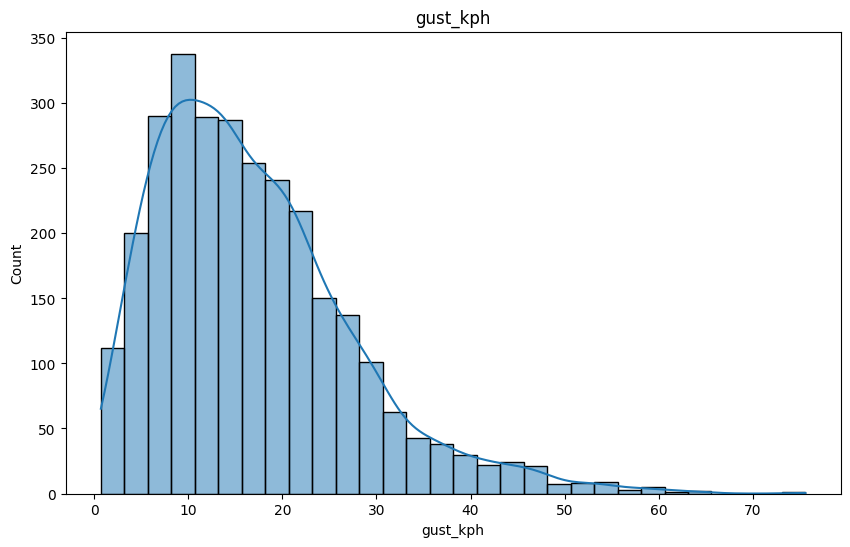

In [334]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(daily_data['gust_kph'], kde=True,bins=30)
plt.title('gust_kph')
plt.xlabel('gust_kph')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


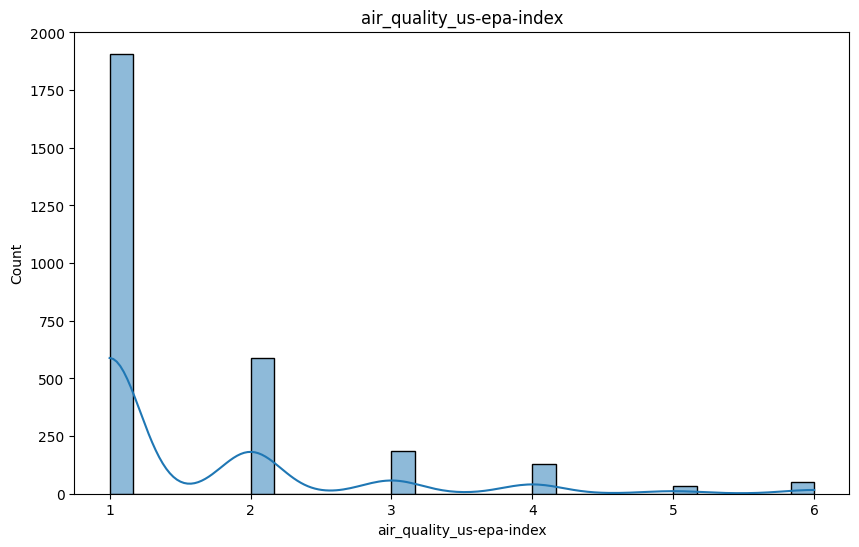

In [335]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(daily_data['air_quality_us-epa-index'], kde=True,bins=30)
plt.title('air_quality_us-epa-index')
plt.xlabel('air_quality_us-epa-index')
plt.show()

In [336]:
daily_data1=daily_data.copy()

In [337]:
daily_data1.drop(['day_id', 'city_id', 'sunrise', 'sunset','condition_text'],axis=1, inplace=True)

<Axes: >

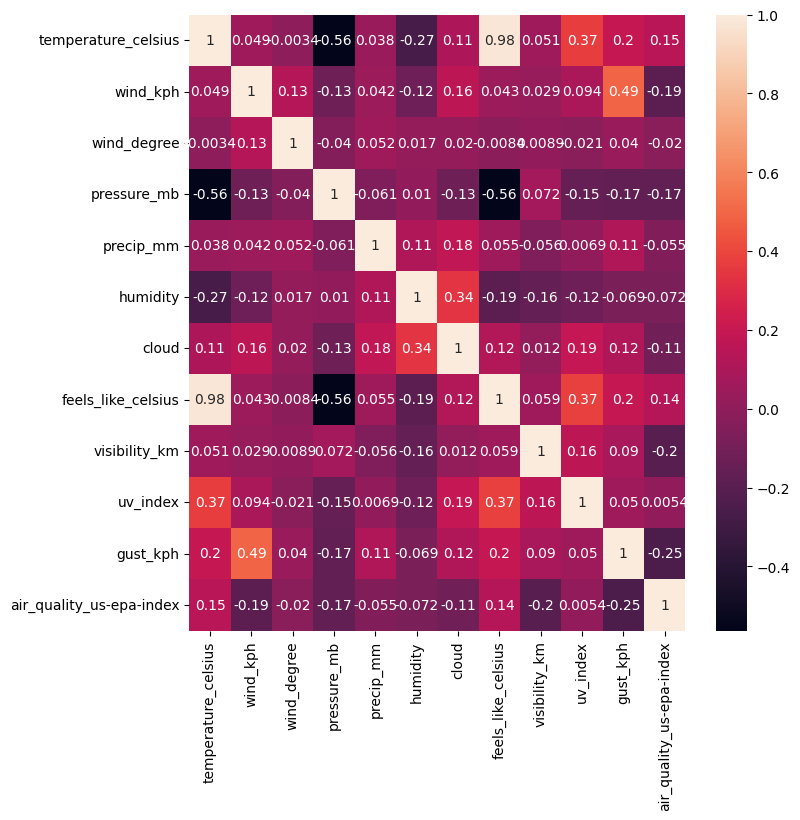

In [338]:
import seaborn as sbn
fig=plt.figure(figsize=(8,8))
ax=fig.gca()
correlations=daily_data1.corr(method="pearson")
sbn.heatmap(correlations, annot=True, ax=ax)



# Data preprocessing

In [339]:
# Convert sunrise and sunset times into numerical features.
from datetime import datetime

def time_to_minutes(time_str):
    time_obj = datetime.strptime(time_str, '%I:%M %p')
    return time_obj.hour * 60 + time_obj.minute
daily_data['sunrise_minutes'] = daily_data['sunrise'].apply(time_to_minutes)
daily_data['sunset_minutes'] = daily_data['sunset'].apply(time_to_minutes)
daily_data


,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise,sunset,sunrise_minutes,sunset_minutes
0,D0001,C001,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,06:04 AM,07:19 PM,364,1159
1,D0002,C001,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,06:05 AM,07:18 PM,365,1158
2,D0003,C001,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,06:05 AM,07:18 PM,365,1158
3,D0004,C001,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,06:06 AM,07:16 PM,366,1156
4,D0005,C001,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,06:07 AM,07:15 PM,367,1155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,D2889,C112,17.1,Clear and Sunny,13.3,61,1017.0,0.0,57,3,17.1,10.0,1.0,22.2,1,05:49 AM,05:51 PM,349,1071
2889,D2890,C112,17.4,NaN,13.0,51,1017.0,0.0,49,0,17.4,10.0,1.0,22.2,1,05:49 AM,05:52 PM,349,1072
2890,D2891,C112,19.2,NaN,11.5,46,1016.0,0.0,34,0,19.2,10.0,1.0,21.3,2,05:48 AM,05:52 PM,348,1072
2891,D2892,C112,19.2,NaN,14.4,76,1017.0,0.0,45,2,19.2,10.0,1.0,24.9,2,05:47 AM,05:52 PM,347,1072


In [340]:
#drop unnecessary columns
daily_data = daily_data.drop(columns=['sunrise', 'sunset'])


In [341]:
daily_data['city_id'] = daily_data['city_id'].astype('category').cat.codes
daily_data.head()

,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise_minutes,sunset_minutes
0,D0001,0,27.0,NaN,6.1,210,1006.0,0.0,54,75,28.0,10.0,6.0,11.9,2,364,1159
1,D0002,0,22.0,NaN,6.1,170,1006.0,0.0,73,75,24.5,10.0,1.0,23.4,1,365,1158
2,D0003,0,20.0,Light Rain with Thunder,3.6,10,1011.0,4.5,100,75,20.0,10.0,1.0,12.6,1,365,1158
3,D0004,0,17.0,Clear and Sunny,6.1,150,1018.0,0.0,88,0,17.0,10.0,1.0,11.2,1,366,1156
4,D0005,0,18.0,NaN,3.6,92,1019.0,0.0,94,0,18.0,10.0,1.0,9.0,1,367,1155


In [342]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

known_conditions = daily_data[daily_data['condition_text'].notnull()]
unknown_conditions = daily_data[daily_data['condition_text'].isnull()]



In [343]:
#ENCODE the conditon text labels
label_encoder = LabelEncoder()
array=known_conditions['condition_text'].values
label_encoder.fit(array.ravel())
array_encoded=label_encoder.transform(array)
known_conditions['condition_text_encoded']=array_encoded
known_conditions

/tmp/ipykernel_33/285582048.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  known_conditions['condition_text_encoded']=array_encoded


,day_id,city_id,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_mb,precip_mm,humidity,cloud,feels_like_celsius,visibility_km,uv_index,gust_kph,air_quality_us-epa-index,sunrise_minutes,sunset_minutes,condition_text_encoded
2,D0003,0,20.0,Light Rain with Thunder,3.6,10,1011.0,4.50,100,75,20.0,10.0,1.0,12.6,1,365,1158,3
3,D0004,0,17.0,Clear and Sunny,6.1,150,1018.0,0.00,88,0,17.0,10.0,1.0,11.2,1,366,1156,0
6,D0007,0,21.0,Partly Cloudy,4.0,310,1015.0,0.00,100,50,21.0,10.0,1.0,15.1,2,368,1151,6
18,D0019,0,19.0,Clear and Sunny,3.6,64,1017.0,0.00,88,0,19.0,10.0,1.0,8.3,3,380,1131,0
27,D0028,1,19.0,Partly Cloudy,3.6,83,1010.0,0.00,73,25,19.0,10.0,1.0,8.3,1,377,1160,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2838,D2839,109,27.0,Partly Cloudy,19.1,90,1014.0,0.01,70,25,29.8,10.0,6.0,45.6,1,339,1063,6
2863,D2864,110,21.4,Light Precipitation,3.6,178,1012.0,0.00,89,75,21.4,10.0,6.0,6.6,1,377,1105,2
2873,D2874,111,16.9,Clear and Sunny,16.6,68,1018.0,0.00,44,2,16.9,10.0,1.0,27.0,1,362,1069,0
2886,D2887,111,19.5,Clear and Sunny,5.4,27,1014.0,0.00,34,0,19.4,10.0,1.0,11.2,2,351,1071,0


In [344]:
known_conditions['condition_text_encoded'].unique()


array([3, 0, 6, 2, 1, 4, 7, 5, 8])

In [345]:
#split features and target
features = known_conditions.drop(columns=['day_id', 'condition_text', 'condition_text_encoded'])
target = known_conditions['condition_text_encoded']



In [346]:
#droping highly correlated column 'feels_like_temperature'
features_reduced = features.drop(columns=['feels_like_celsius','cloud'])


In [347]:
#split train and test sets
x_train, x_test, y_train, y_test = train_test_split(features_reduced, target, test_size=0.2, random_state=42)


# Model Training

In [348]:
rf_classifier=RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
conditon_prediction=rf_classifier.predict(x_test)
classification= classification_report(y_test, conditon_prediction, target_names=label_encoder.classes_)
print(classification)

                         precision    recall  f1-score   support

        Clear and Sunny       0.49      0.82      0.61        22
    Cloudy and Overcast       0.25      0.17      0.20        12
    Light Precipitation       0.58      0.58      0.58        12
Light Rain with Thunder       0.00      0.00      0.00         5
            Mist or Fog       0.80      1.00      0.89         8
 Moderate to Heavy Rain       0.00      0.00      0.00         4
          Partly Cloudy       0.42      0.38      0.40        26
           Rain Showers       0.50      0.20      0.29         5
          Thunderstorms       0.00      0.00      0.00         2

               accuracy                           0.48        96
              macro avg       0.34      0.35      0.33        96
           weighted avg       0.42      0.48      0.44        96



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model Evaluation

In [349]:
unknown_features_reduced = unknown_conditions.drop(columns=['day_id', 'condition_text', 'feels_like_celsius', 'cloud'])
predicted_conditions_encoded = rf_classifier.predict(unknown_features_reduced)

predicted_conditions = label_encoder.inverse_transform(predicted_conditions_encoded)



In [355]:
submission_filtered = submission[submission['day_id'].isin(unknown_conditions['day_id'])].copy()
submission_filtered['condition_text'] = predicted_conditions
final_submission  =submission.merge(submission_filtered[['day_id', 'condition_text']], on='day_id', how='left', suffixes=('', '_predicted'))
final_submission ['condition_text'] = final_submission['condition_text_predicted'].combine_first(final_submission['condition_text'])
final_submission  = final_submission .drop(columns=['condition_text_predicted'])
print(final_submission)



     day_id           condition_text
0     D0001          Clear and Sunny
1     D0002            Partly Cloudy
2     D0003  Light Rain with Thunder
3     D0004          Clear and Sunny
4     D0005          Clear and Sunny
...     ...                      ...
2888  D2889          Clear and Sunny
2889  D2890          Clear and Sunny
2890  D2891          Clear and Sunny
2891  D2892          Clear and Sunny
2892  D2893          Clear and Sunny

[2893 rows x 2 columns]


In [356]:
final_submission.to_csv('/kaggle/working/your_submission.csv',index=False)
